In [74]:
#Allison R. Deming#
#IST 718#
#Homework 1 Code#


In [75]:
#*IMPORTING*#

import pandas as pd #Importing PANDAS
import numpy as np #Importing NUMPY
import requests #REQUESTS
from functools import reduce #TOOLS
import re #RE
from scipy.stats import uniform  # TRAIN/TEST SPLITTING
import statsmodels.formula.api as smf  # MODEL SPECIFICATION
import matplotlib.pyplot as plt  #PLOTTING
from matplotlib import rcParams #MATPLOT
import seaborn as sb  # SEABORN PLOTTING TOOL

# **OBTAIN STEP**

In [76]:
#GETTING THE DATA
stadium_data = pd.read_csv('https://raw.githubusercontent.com/gboeing/data-visualization/main/ncaa-football-stadiums/data/stadiums-geocoded.csv') #Using PD to import data
print(stadium_data.info()) #printing
stadium_data.head() #What top 10 rows look like

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   stadium     253 non-null    object 
 1   city        253 non-null    object 
 2   state       253 non-null    object 
 3   team        253 non-null    object 
 4   conference  253 non-null    object 
 5   capacity    253 non-null    int64  
 6   built       253 non-null    int64  
 7   expanded    146 non-null    object 
 8   div         253 non-null    object 
 9   latitude    253 non-null    float64
 10  longitude   253 non-null    float64
dtypes: float64(2), int64(2), object(7)
memory usage: 21.9+ KB
None


,stadium,city,state,team,conference,capacity,built,expanded,div,latitude,longitude
0,Michigan Stadium,Ann Arbor,MI,Michigan,Big Ten,107601,1927,2015,fbs,42.265869,-83.748726
1,Beaver Stadium,University Park,PA,Penn State,Big Ten,106572,1960,2001,fbs,40.812153,-77.856202
2,Ohio Stadium,Columbus,OH,Ohio State,Big Ten,104944,1922,2014,fbs,40.001686,-83.019728
3,Kyle Field,College Station,TX,Texas A&M,SEC,102733,1927,2015,fbs,30.610098,-96.340729
4,Neyland Stadium,Knoxville,TN,Tennessee,SEC,102455,1921,2010,fbs,35.954734,-83.925333


In [77]:

coach_data = pd.read_csv('https://raw.githubusercontent.com/2SUBDA/IST_718/master/Coaches9.csv') #importing data using pd
print(coach_data.info()) #printing

coach_data = coach_data.rename(columns={'School':'team'}) # Renaming the School column to team where merging works
coach_data.head() #First 10 rows of df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   School        129 non-null    object
 1   Conference    129 non-null    object
 2   Coach         129 non-null    object
 3   SchoolPay     129 non-null    object
 4   TotalPay      129 non-null    object
 5   Bonus         129 non-null    object
 6   BonusPaid     129 non-null    object
 7   AssistantPay  129 non-null    object
 8   Buyout        129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB
None


,team,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--
1,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500"
2,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000"
3,Alabama at Birmingham,C-USA,Bill Clark,"$900,000","$900,000","$950,000","$165,471",$0,"$3,847,500"
4,Appalachian State,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417"


In [78]:
stadium_data.sort_values('team')

,stadium,city,state,team,conference,capacity,built,expanded,div,latitude,longitude
176,Shotwell Stadium,Abilene,Texas,Abilene Christian Wildcats,Southland,15075,1959,2002,fcs,32.433802,-99.697366
66,Falcon Stadium,Colorado Springs,CO,Air Force,Mountain West,46692,1962,NaN,fbs,38.996907,-104.843688
105,Summa Field at InfoCision Stadium,Akron,OH,Akron,MAC,30000,2009,NaN,fbs,41.072570,-81.508384
6,Bryant–Denny Stadium,Tuscaloosa,AL,Alabama,SEC,101821,1929,2010,fbs,33.207490,-87.550392
150,Louis Crews Stadium,Huntsville,Alabama,Alabama A&M Bulldogs,SWAC,21000,1996,NaN,fcs,34.783215,-86.579304
...,...,...,...,...,...,...,...,...,...,...,...
18,Camp Randall Stadium,Madison,WI,Wisconsin,Big Ten,80321,1917,2005,fbs,43.069938,-89.412746
186,Gibbs Stadium,Spartanburg,South Carolina,Wofford Terriers,Southern,13000,1996,NaN,fcs,34.961861,-81.933498
109,War Memorial Stadium,Laramie,WY,Wyoming,Mountain West,29181,1950,2010,fbs,41.311936,-105.569065
129,Yale Bowl,New Haven,Connecticut,Yale Bulldogs,Ivy,61446,1914,NaN,fcs,41.312125,-72.960229


In [79]:
url = 'https://www.teamrankings.com/ncf/trends/win_trends/?range=yearly_since_2010' #Win and Losses information
html = requests.get(url).content
df = pd.read_html(html) #Using Pandas to get the data
wins_losses = df[0]
print(wins_losses.info()) #printing

wins_losses = wins_losses.rename(columns={'Team':'team'}) #Fixing this column where it will merge across dfs
wins_losses.head() #First rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Team             131 non-null    object 
 1   Win-Loss Record  131 non-null    object 
 2   Win %            131 non-null    object 
 3   MOV              131 non-null    float64
 4   ATS +/-          131 non-null    float64
dtypes: float64(2), object(3)
memory usage: 5.2+ KB
None


,team,Win-Loss Record,Win %,MOV,ATS +/-
0,Alabama,161-19-0,89.4%,24.4,2.2
1,Ohio State,146-23-0,86.4%,20.8,2.8
2,Clemson,147-31-0,82.6%,17.3,1.8
3,Oklahoma,135-36-0,79.0%,14.5,-0.6
4,Georgia,137-39-0,77.8%,15.9,1.2


In [80]:

grad_data = pd.read_csv('https://ncaaorg.s3.amazonaws.com/research/gradrates/data/2018RES_File5-DISquadAggregationSA.csv') #Importing the Graduation Data from the schools
print(grad_data.info()) #Printing
grad_data.head() #Taking a look at the first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SCL_UNITID          5403 non-null   int64  
 1   SCL_NAME            5403 non-null   object 
 2   SCL_DIVISION        5403 non-null   int64  
 3   SCL_SUBDIVISION     5403 non-null   int64  
 4   SCL_CONFERENCE      5403 non-null   object 
 5   DIV1_FB_CONFERENCE  4005 non-null   object 
 6   SCL_HBCU            5403 non-null   int64  
 7   SCL_PRIVATE         5403 non-null   int64  
 8   SPORT               5403 non-null   object 
 9   SPONSORED           5403 non-null   int64  
 10  FED_RATE            5093 non-null   float64
 11  GSR                 5264 non-null   float64
dtypes: float64(2), int64(6), object(4)
memory usage: 506.7+ KB
None


,SCL_UNITID,SCL_NAME,SCL_DIVISION,SCL_SUBDIVISION,SCL_CONFERENCE,DIV1_FB_CONFERENCE,SCL_HBCU,SCL_PRIVATE,SPORT,SPONSORED,FED_RATE,GSR
0,100654,Alabama A&M University,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,1,0,WSB,1,57.0,61.0
1,100654,Alabama A&M University,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,1,0,MFB,1,47.0,62.0
2,100654,Alabama A&M University,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,1,0,WSO,1,50.0,67.0
3,100654,Alabama A&M University,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,1,0,MSO,0,29.0,NaN
4,100654,Alabama A&M University,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,1,0,WBW,1,86.0,86.0


In [81]:
# FILTERING DOWN TO JUST THE MEN'S FOOTBALL FOR THIS HOMEWORK
filter1 = grad_data.loc[(grad_data['SPORT'] == 'MFB')]
print(filter1.info())
filter1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 1 to 5370
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SCL_UNITID          252 non-null    int64  
 1   SCL_NAME            252 non-null    object 
 2   SCL_DIVISION        252 non-null    int64  
 3   SCL_SUBDIVISION     252 non-null    int64  
 4   SCL_CONFERENCE      252 non-null    object 
 5   DIV1_FB_CONFERENCE  249 non-null    object 
 6   SCL_HBCU            252 non-null    int64  
 7   SCL_PRIVATE         252 non-null    int64  
 8   SPORT               252 non-null    object 
 9   SPONSORED           252 non-null    int64  
 10  FED_RATE            238 non-null    float64
 11  GSR                 249 non-null    float64
dtypes: float64(2), int64(6), object(4)
memory usage: 25.6+ KB
None


,SCL_UNITID,SCL_NAME,SCL_DIVISION,SCL_SUBDIVISION,SCL_CONFERENCE,DIV1_FB_CONFERENCE,SCL_HBCU,SCL_PRIVATE,SPORT,SPONSORED,FED_RATE,GSR
1,100654,Alabama A&M University,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,1,0,MFB,1,47.0,62.0
18,100663,University of Alabama at Birmingham,1,1,Conference USA,Conference USA,2,0,MFB,1,58.0,71.0
29,100724,Alabama State University,1,2,Southwestern Athletic Conf.,Southwestern Athletic Conf.,1,0,MFB,1,42.0,58.0
51,100751,University of Alabama,1,1,Southeastern Conference,Southeastern Conference,2,0,MFB,1,63.0,84.0
71,100858,Auburn University,1,1,Southeastern Conference,Southeastern Conference,2,0,MFB,1,60.0,72.0


In [82]:

remove_words = ['University', 'of'] #Cleaning out some common words

pat = r'\b(?:{})\b'.format('|'.join(remove_words))

filter1['SCL_NAME'] = filter1['SCL_NAME'].str.replace(pat,"")
filter1

grad_data2 = filter1[['SCL_NAME', 'SCL_PRIVATE','FED_RATE', 'GSR']].copy() #This block of code created a data frame we can use to answer our question about coaches and salary
grad_data2 = grad_data2.rename(columns={'SCL_NAME':'team'})
grad_data2['team'] = grad_data2['team'].str.strip()

C:\Users\16512\AppData\Local\Temp\ipykernel_14932\2913083043.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  filter1['SCL_NAME'] = filter1['SCL_NAME'].str.replace(pat,"")
C:\Users\16512\AppData\Local\Temp\ipykernel_14932\2913083043.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter1['SCL_NAME'] = filter1['SCL_NAME'].str.replace(pat,"")


In [83]:

mergesdf = [coach_data, grad_data2, stadium_data, wins_losses] #Finally MERGING!
merge = reduce(lambda left, right: pd.merge(left, right, on = 'team'),mergesdf)
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             50 non-null     object 
 1   Conference       50 non-null     object 
 2   Coach            50 non-null     object 
 3   SchoolPay        50 non-null     object 
 4   TotalPay         50 non-null     object 
 5   Bonus            50 non-null     object 
 6   BonusPaid        50 non-null     object 
 7   AssistantPay     50 non-null     object 
 8   Buyout           50 non-null     object 
 9   SCL_PRIVATE      50 non-null     int64  
 10  FED_RATE         50 non-null     float64
 11  GSR              50 non-null     float64
 12  stadium          50 non-null     object 
 13  city             50 non-null     object 
 14  state            50 non-null     object 
 15  conference       50 non-null     object 
 16  capacity         50 non-null     int64  
 17  built            5

# **SCRUB**

In [84]:
# Scrub, scrub, scrubbing away unneeded puncuation, special characters, and white space. 
#This is because we need numeric columns and that would interfere.

merge['TotalPay'] = merge['TotalPay'].str.replace(r'[^\w\s]+', '')
merge['SchoolPay'] = merge['SchoolPay'].str.replace(r'[^\w\s]+', '')
merge['Bonus'] = merge['Bonus'].str.replace(r'[^\w\s]+', '')
merge['BonusPaid'] = merge['BonusPaid'].str.replace(r'[^\w\s]+', '')
merge['AssistantPay'] = merge['AssistantPay'].str.replace(r'[^\w\s]+', '')
merge['TotalPay'] = merge['TotalPay'].str.replace(r'[^\w\s]+', '')
merge['Buyout'] = merge['Buyout'].str.replace(r'[^\w\s]+', '')
merge['Win %'] = merge['Win %'].str.replace(r'[^\w\s]+', '') 


C:\Users\16512\AppData\Local\Temp\ipykernel_14932\4278022076.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  merge['TotalPay'] = merge['TotalPay'].str.replace(r'[^\w\s]+', '')
C:\Users\16512\AppData\Local\Temp\ipykernel_14932\4278022076.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  merge['SchoolPay'] = merge['SchoolPay'].str.replace(r'[^\w\s]+', '')
C:\Users\16512\AppData\Local\Temp\ipykernel_14932\4278022076.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  merge['Bonus'] = merge['Bonus'].str.replace(r'[^\w\s]+', '')
C:\Users\16512\AppData\Local\Temp\ipykernel_14932\4278022076.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  merge['BonusPaid'] = merge['BonusPaid'].str.replace(r'[^\w\s]+', '')
C:\Users\16512\AppData\Local\Temp\ipykernel_14932\4278022076.py:8: FutureWarning: 

In [85]:
# Converting quite a few columns to numeric as mentioned above
cols = merge.columns.drop(['team', 'Conference', 'Coach','SCL_PRIVATE','FED_RATE','GSR','stadium','city','state', 'conference','capacity', 'built', 'expanded', 'div', 'latitude', 'longitude', 'Win-Loss Record', 'MOV', 'ATS +/-'])

merge[cols] = merge[cols].apply(pd.to_numeric, errors='coerce')

merge['Win %'] = merge['Win %'] / 10 #Dividing by 10 will not make this a whole number and will convert everything to an index

merge = merge.rename(columns={'Win %':'Win_Percent'}) #Cleaning this up to merge as the names are different

print(merge.info()) #Printing
merge.head() #First Part of the df, taking a look

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             50 non-null     object 
 1   Conference       50 non-null     object 
 2   Coach            50 non-null     object 
 3   SchoolPay        48 non-null     float64
 4   TotalPay         48 non-null     float64
 5   Bonus            39 non-null     float64
 6   BonusPaid        34 non-null     float64
 7   AssistantPay     50 non-null     int64  
 8   Buyout           39 non-null     float64
 9   SCL_PRIVATE      50 non-null     int64  
 10  FED_RATE         50 non-null     float64
 11  GSR              50 non-null     float64
 12  stadium          50 non-null     object 
 13  city             50 non-null     object 
 14  state            50 non-null     object 
 15  conference       50 non-null     object 
 16  capacity         50 non-null     int64  
 17  built            5

,team,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,SCL_PRIVATE,...,capacity,built,expanded,div,latitude,longitude,Win-Loss Record,Win_Percent,MOV,ATS +/-
0,Akron,MAC,Terry Bowden,411000.0,412500.0,225000.0,50000.0,0,688500.0,0,...,30000,2009,NaN,fbs,41.072570,-81.508384,42-111-0,27.5,-11.8,-2.9
1,Alabama,SEC,Nick Saban,8307000.0,8307000.0,1100000.0,500000.0,0,33600000.0,0,...,101821,1929,2010,fbs,33.207490,-87.550392,161-19-0,89.4,24.4,2.2
2,Arizona,Pac-12,Kevin Sumlin,1600000.0,2000000.0,2025000.0,NaN,0,10000000.0,0,...,51811,1928,1988,fbs,32.228340,-110.949039,69-87-0,44.2,-1.7,-1.7
3,Auburn,SEC,Gus Malzahn,6700000.0,6705656.0,1400000.0,375000.0,0,32143750.0,0,...,87451,1939,2004,fbs,32.602362,-85.488911,104-64-0,61.9,7.0,0.5
4,Ball State,MAC,Mike Neu,435689.0,435689.0,380000.0,30000.0,0,980300.0,0,...,22500,1967,2007,fbs,40.216028,-85.417700,70-85-0,45.2,-3.6,-0.7


In [86]:

cleanMerge= merge #Just making sure not to alter the original data set, so we will make a new one! 

In [87]:

def index_find_isnull(dataframe, col1, col2): # This function will show find the index of a unavailable records in the first specified column.
  
  d2 = dataframe.loc[pd.isnull(dataframe[col1]),[col1,col2]]

  return d2

In [88]:
def totalpay_clean(dataframe, TotalPay, Conference, index): #Basically doing the same thing with TotalPay Here
  mean2 = dataframe[TotalPay].loc[(dataframe['Conference'] == Conference) & (dataframe[TotalPay].notna())].mean()

  dataframe.loc[index,TotalPay]=mean2

In [89]:

def bonus_clean(dataframe, Bonus, Conference, index):
  mean2 = dataframe[Bonus].loc[(dataframe['Conference'] == Conference) & (dataframe[Bonus].notna())].mean()

  dataframe.loc[index,Bonus]=mean2

In [90]:

index_find_isnull(cleanMerge,'TotalPay','Conference') #Looking for the index of the missing data in TotalPay

,TotalPay,Conference
5,NaN,Big 12
35,NaN,C-USA


In [91]:

totalpay_clean(cleanMerge, 'TotalPay', 'Big 12', 5) #Using the mean to replace the NaN values for the Big 12 Conference

totalpay_clean(cleanMerge, 'TotalPay', 'C-USA', 35) #Doing the same thing for C-USA Conference

In [92]:
index_find_isnull(cleanMerge,'Bonus', 'Conference') #Looking for the NaN values here in the Bonus Category

,Bonus,Conference
5,NaN,Big 12
10,NaN,ACC
27,NaN,Big Ten
28,NaN,Ind.
33,NaN,ACC
35,NaN,C-USA
36,NaN,Pac-12
37,NaN,ACC
42,NaN,AAC
45,NaN,SEC


In [93]:

bonus_clean(cleanMerge, 'Bonus', 'Big 12', 5) #Bonus mean to replace NA Values in this conference
bonus_clean(cleanMerge, 'Bonus', 'Big Ten', 27) #Bonus mean to replace NA Values in this conference
bonus_clean(cleanMerge, 'Bonus', 'C-USA', 35) #Bonus mean to replace NA Values in this conference
bonus_clean(cleanMerge, 'Bonus', 'Pac-12', 36) #Bonus mean to replace NA Values in this conference
bonus_clean(cleanMerge, 'Bonus', 'SEC', 45) #Bonus mean to replace NA Values in this conference
cleanMerge.loc[28,'Bonus']=cleanMerge['Bonus'].mean() #This is for Notre Dame, they are independant therefore the mean for the entire dataset is used to replace NAs.


In [94]:

ACC_mean = cleanMerge['Bonus'].loc[(cleanMerge['Conference'] == 'ACC') & (cleanMerge['Bonus'].notna())].mean()

cleanMerge.loc[10,'Bonus']=ACC_mean #In the ACC there are only five locations with no bonus information, those will all be replaced with the mean. 
cleanMerge.loc[33,'Bonus']=ACC_mean #In the ACC there are only five locations with no bonus information, those will all be replaced with the mean.
cleanMerge.loc[37,'Bonus']=ACC_mean #In the ACC there are only five locations with no bonus information, those will all be replaced with the mean.
cleanMerge.loc[42,'Bonus']=ACC_mean #In the ACC there are only five locations with no bonus information, those will all be replaced with the mean.
cleanMerge.loc[47,'Bonus']=ACC_mean #In the ACC there are only five locations with no bonus information, those will all be replaced with the mean.

In [95]:
cleanMerge
cleanMerge.info() #Taking a Look

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             50 non-null     object 
 1   Conference       50 non-null     object 
 2   Coach            50 non-null     object 
 3   SchoolPay        48 non-null     float64
 4   TotalPay         50 non-null     float64
 5   Bonus            50 non-null     float64
 6   BonusPaid        34 non-null     float64
 7   AssistantPay     50 non-null     int64  
 8   Buyout           39 non-null     float64
 9   SCL_PRIVATE      50 non-null     int64  
 10  FED_RATE         50 non-null     float64
 11  GSR              50 non-null     float64
 12  stadium          50 non-null     object 
 13  city             50 non-null     object 
 14  state            50 non-null     object 
 15  conference       50 non-null     object 
 16  capacity         50 non-null     int64  
 17  built            5

In [96]:
cleanMerge['TotalPay'] = cleanMerge['TotalPay'] / 100000 #As both the Total and Bonus Pay for college football coaches is SO ASTRONOMICALLY HIGH, we are changing the view to $100,000 to make it more viewable and comparable
cleanMerge['Bonus'] = cleanMerge['Bonus'] / 100000

# **EXPLORE**

In [97]:

analysis1 = cleanMerge #Creating another unique dataset for some analyses. If all goes well, we should end up with three or so of these. 
analysis1 #Viewing the dataframe

,team,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,SCL_PRIVATE,...,capacity,built,expanded,div,latitude,longitude,Win-Loss Record,Win_Percent,MOV,ATS +/-
0,Akron,MAC,Terry Bowden,411000.0,4.125000,2.25000,50000.0,0,688500.0,0,...,30000,2009,NaN,fbs,41.072570,-81.508384,42-111-0,27.5,-11.8,-2.9
1,Alabama,SEC,Nick Saban,8307000.0,83.070000,11.00000,500000.0,0,33600000.0,0,...,101821,1929,2010,fbs,33.207490,-87.550392,161-19-0,89.4,24.4,2.2
2,Arizona,Pac-12,Kevin Sumlin,1600000.0,20.000000,20.25000,NaN,0,10000000.0,0,...,51811,1928,1988,fbs,32.228340,-110.949039,69-87-0,44.2,-1.7,-1.7
3,Auburn,SEC,Gus Malzahn,6700000.0,67.056560,14.00000,375000.0,0,32143750.0,0,...,87451,1939,2004,fbs,32.602362,-85.488911,104-64-0,61.9,7.0,0.5
4,Ball State,MAC,Mike Neu,435689.0,4.356890,3.80000,30000.0,0,980300.0,0,...,22500,1967,2007,fbs,40.216028,-85.417700,70-85-0,45.2,-3.6,-0.7
5,Baylor,Big 12,Matt Rhule,NaN,34.262710,12.37500,NaN,0,NaN,1,...,45140,2014,NaN,fbs,31.558663,-97.115600,103-63-0,62.1,8.7,1.4
6,Boise State,Mt. West,Bryan Harsin,1650010.0,16.500100,4.75000,145000.0,0,7784038.0,0,...,37000,1970,2012,fbs,43.602708,-116.195912,129-37-0,77.7,14.8,0.4
7,Cincinnati,AAC,Luke Fickell,2000000.0,20.000000,6.25000,0.0,0,7100000.0,0,...,40000,1924,2015,fbs,39.131284,-84.516261,110-55-0,66.7,8.1,0.5
8,Clemson,ACC,Dabo Swinney,6205000.0,65.433500,11.25000,500000.0,0,35000000.0,0,...,81500,1942,2006,fbs,34.678747,-82.843180,147-31-0,82.6,17.3,1.8
9,Connecticut,AAC,Randy Edsall,1100000.0,11.000000,6.50000,129000.0,0,1000000.0,0,...,40000,2003,NaN,fbs,41.759884,-72.618942,45-102-0,30.6,-10.7,-2.1


#*I decided to use visualizations to show what the data looks like in the different data frames. I am more of a visual person.*#

Text(0.5, 1.0, 'Stacked Histogram of Coaches Total Pay')

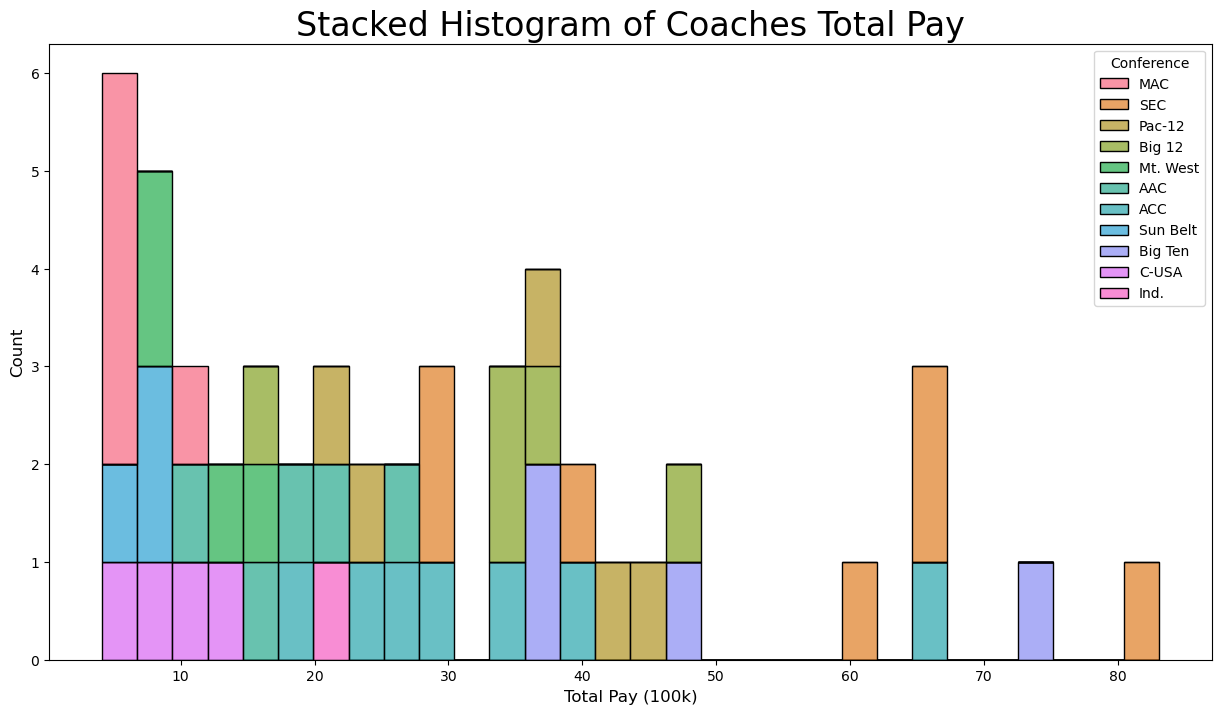

In [98]:
# Stacked Histogram of Coaches salaries by Conference
rcParams['figure.figsize'] = 15,8 #Figure Size
TotalPayHist = sb.histplot(data=analysis1, x='TotalPay', bins=30, hue='Conference', multiple='stack') #Defining the histogram parameters
TotalPayHist.set_xlabel('Total Pay (100k)', fontdict={'fontsize': 12}) #Xlab
TotalPayHist.set_ylabel('Count', fontdict={'fontsize' : 12}) #Ylab
TotalPayHist.set_title('Stacked Histogram of Coaches Total Pay',fontdict={'fontsize' : 24}) #Main Title

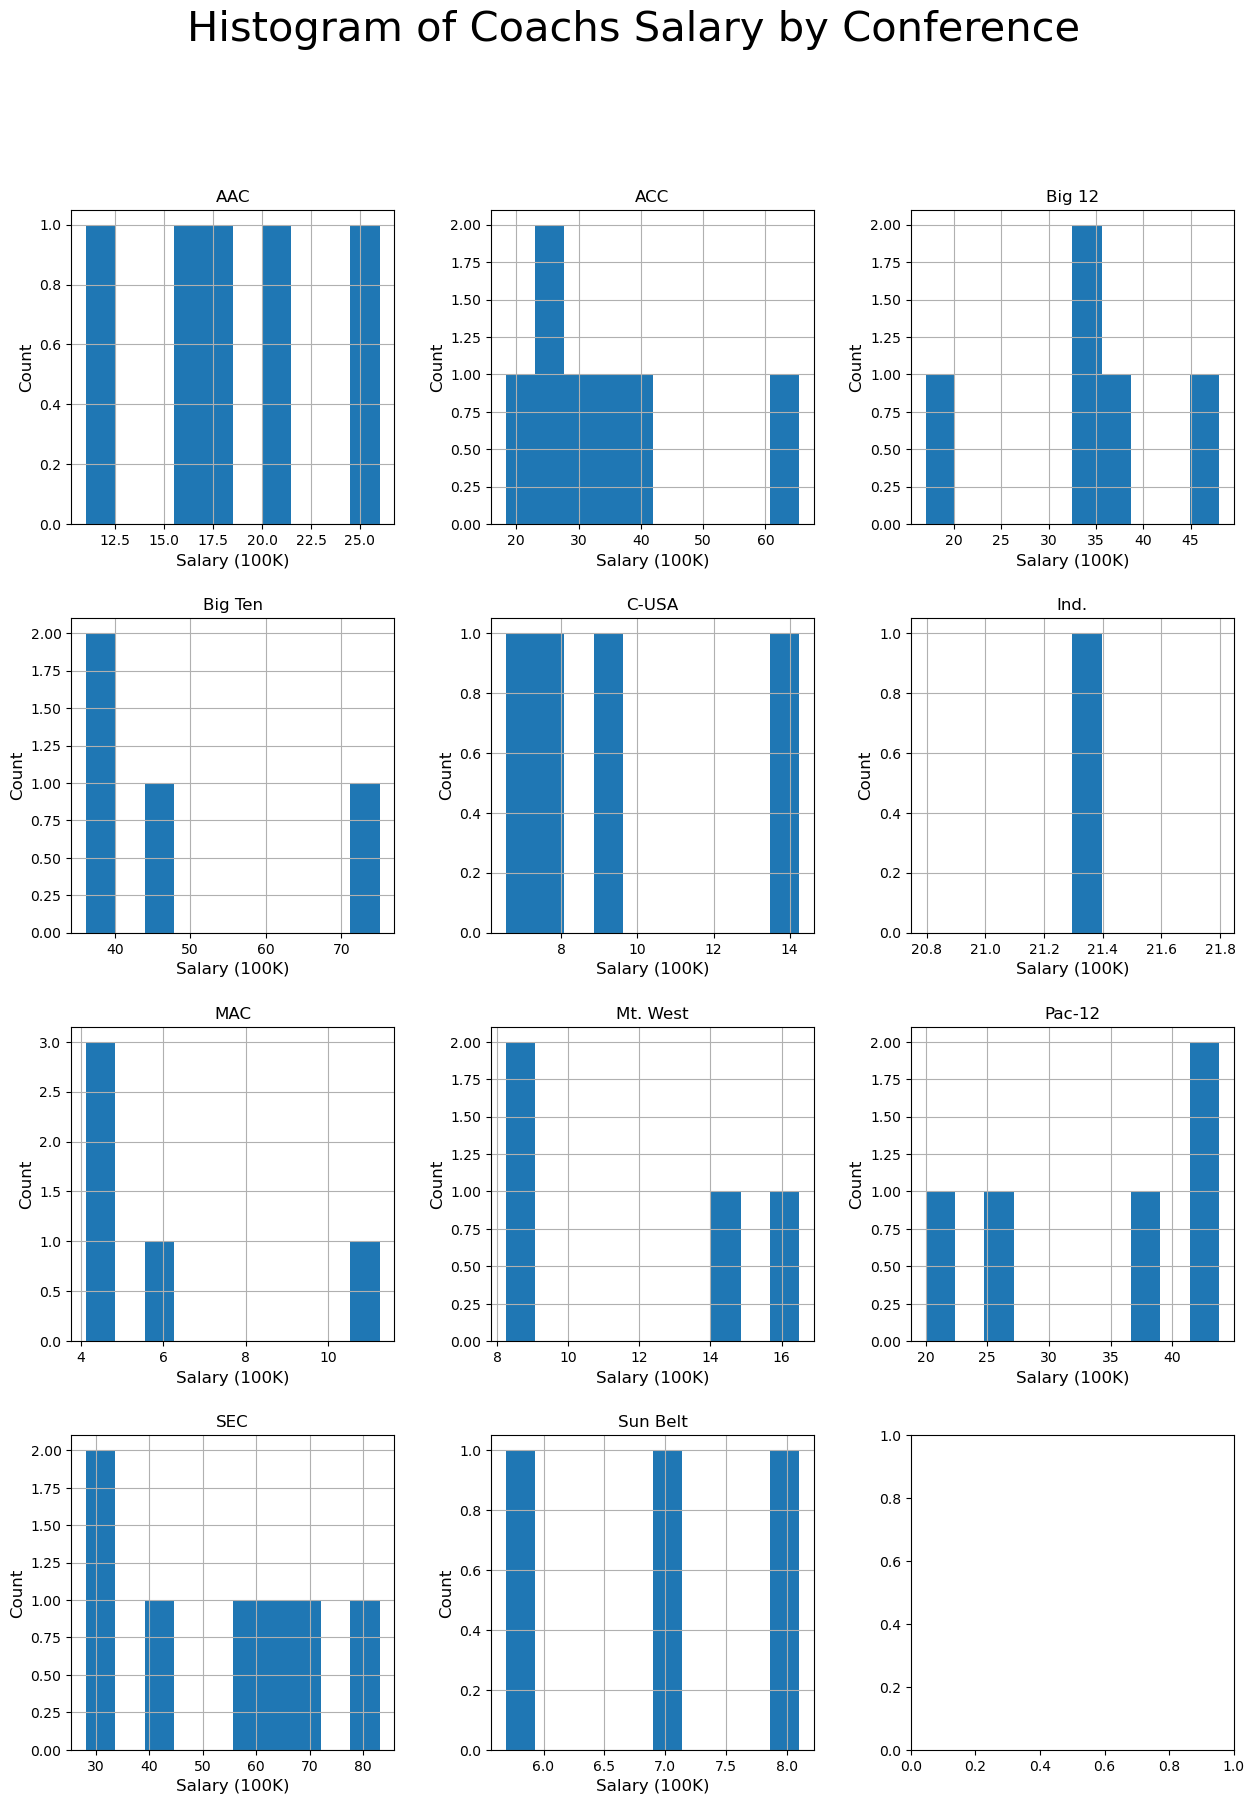

In [99]:
# Coaches salaries by Conference

rcParams['figure.figsize'] = 15,20 #Sizing
fig, axes = plt.subplots(nrows=4, ncols=3) #Defining subplots
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Histogram of Coachs Salary by Conference', fontsize=30) #Main Title

# Generate histograms
for ax, (conference, subdf) in zip(axes.flatten(), analysis1.groupby('Conference')): #Histogram Parameters
    subdf.hist('TotalPay', ax=ax) #Defining the df
    ax.set_title(conference) #Title
    ax.set_xlabel('Salary (100K)',fontsize=12) #xlab
    ax.set_ylabel('Count', fontsize=12) #ylab

plt.show() #Show the plot below! These graphics are awesome compared to what is done in R (Just an opinion)

Text(0.5, 1.0, 'Boxplot of Coach Salary Per Conference')

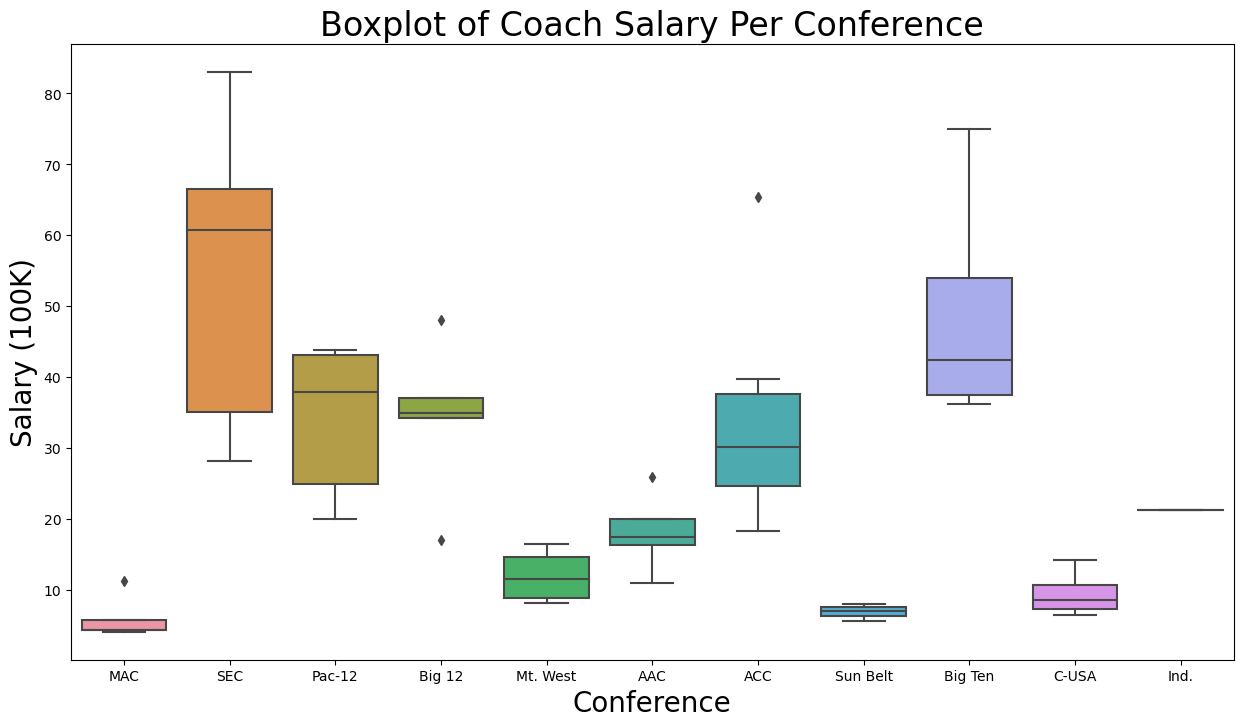

In [100]:

rcParams['figure.figsize'] = 15,8 #Figure Parameters for BW Plot
TotalPayBox = sb.boxplot(data=analysis1, x='Conference', y='TotalPay') #TotalPayBox Defined
TotalPayBox.set_xlabel('Conference', fontdict={'fontsize':20}) #xlab and font size 
TotalPayBox.set_ylabel('Salary (100K)', fontdict={'fontsize':20}) #Same as above but for ylab
TotalPayBox.set_title('Boxplot of Coach Salary Per Conference', fontdict={'fontsize': 24}) #Title and Size

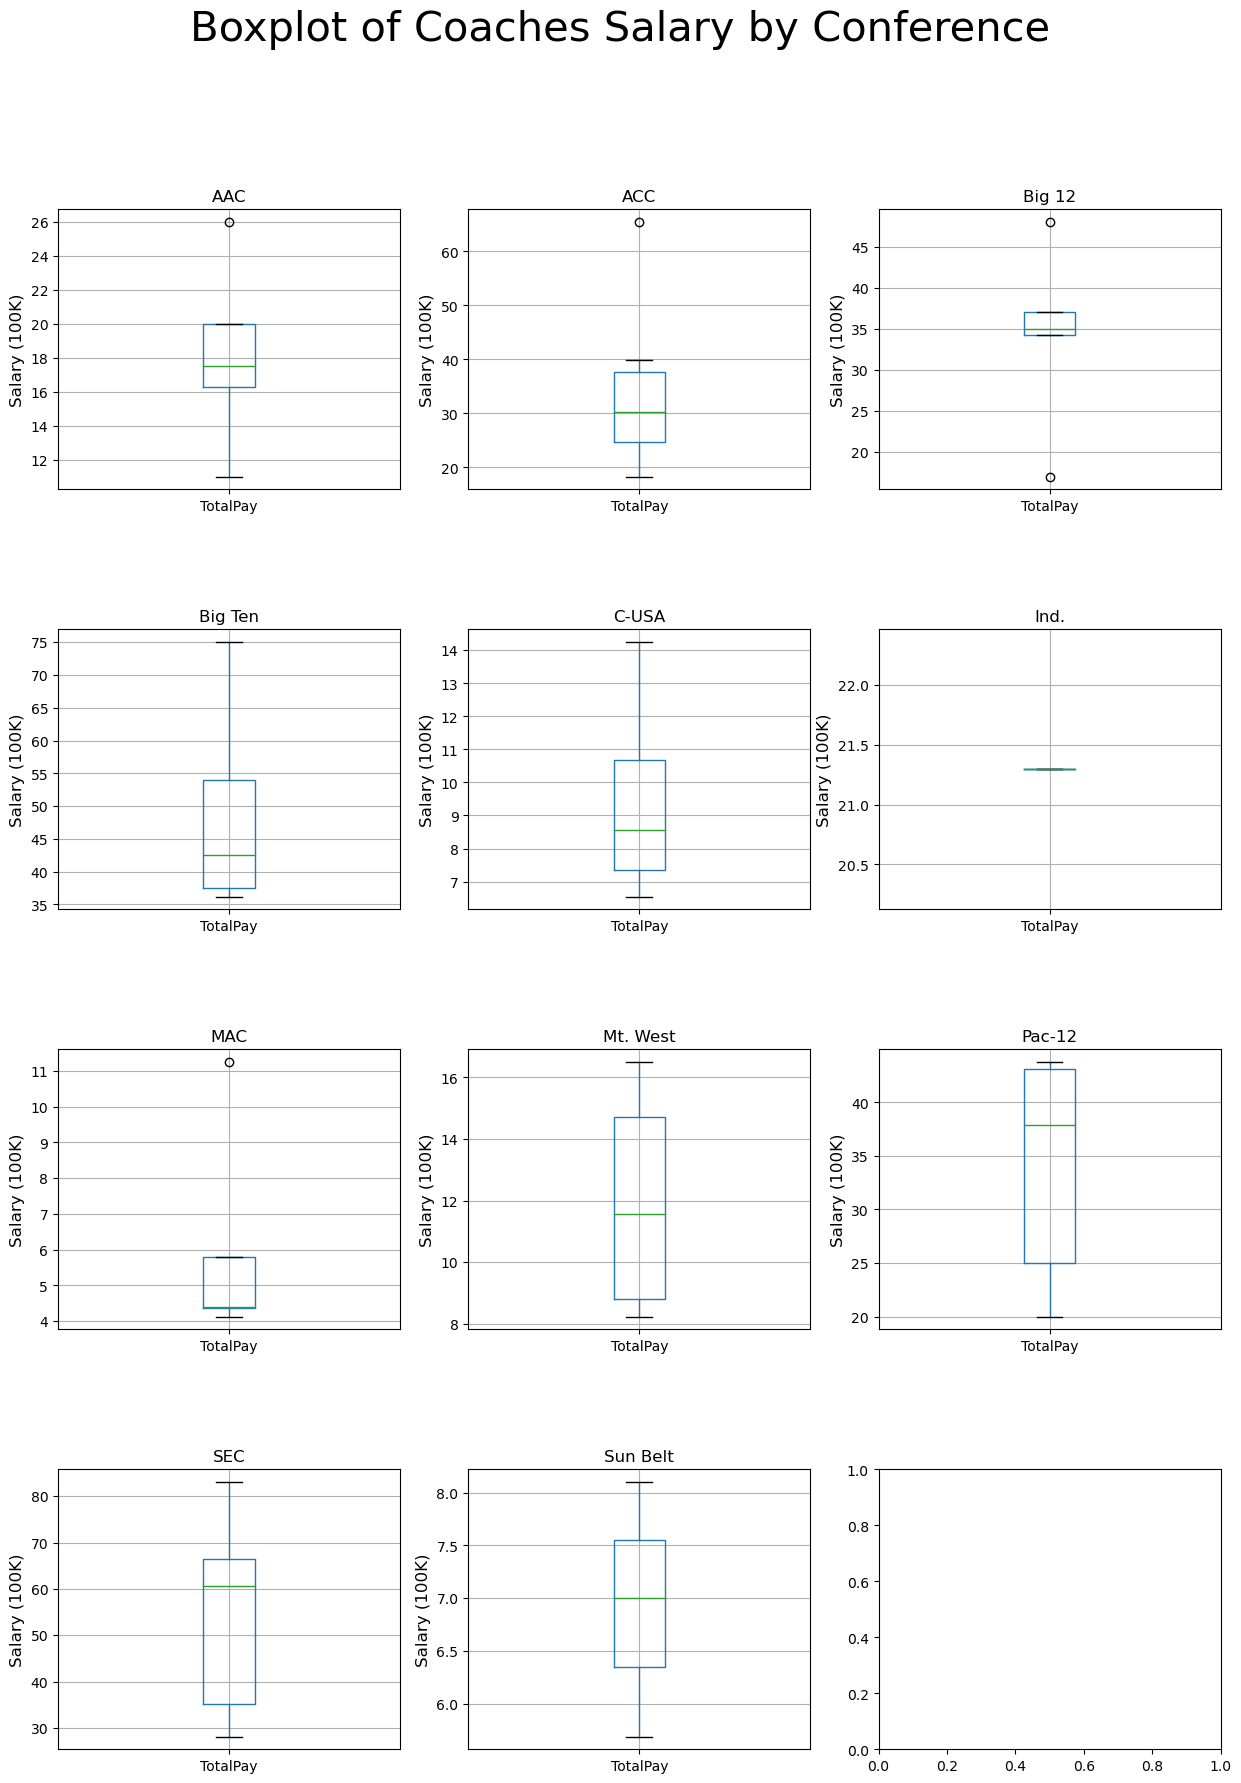

In [101]:

# Subplot of Boxplots of Coaches salaries by Conference

rcParams['figure.figsize'] = 15,20
fig, axes = plt.subplots(nrows=4, ncols=3)
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Boxplot of Coaches Salary by Conference', fontsize=30)

# Generate boxplot
for ax, (conference, subdf) in zip(axes.flatten(), analysis1.groupby('Conference')):
    subdf.boxplot('TotalPay', ax=ax)
    ax.set_title(conference)
    ax.set_ylabel('Salary (100K)',fontsize=12)
    
plt.show()

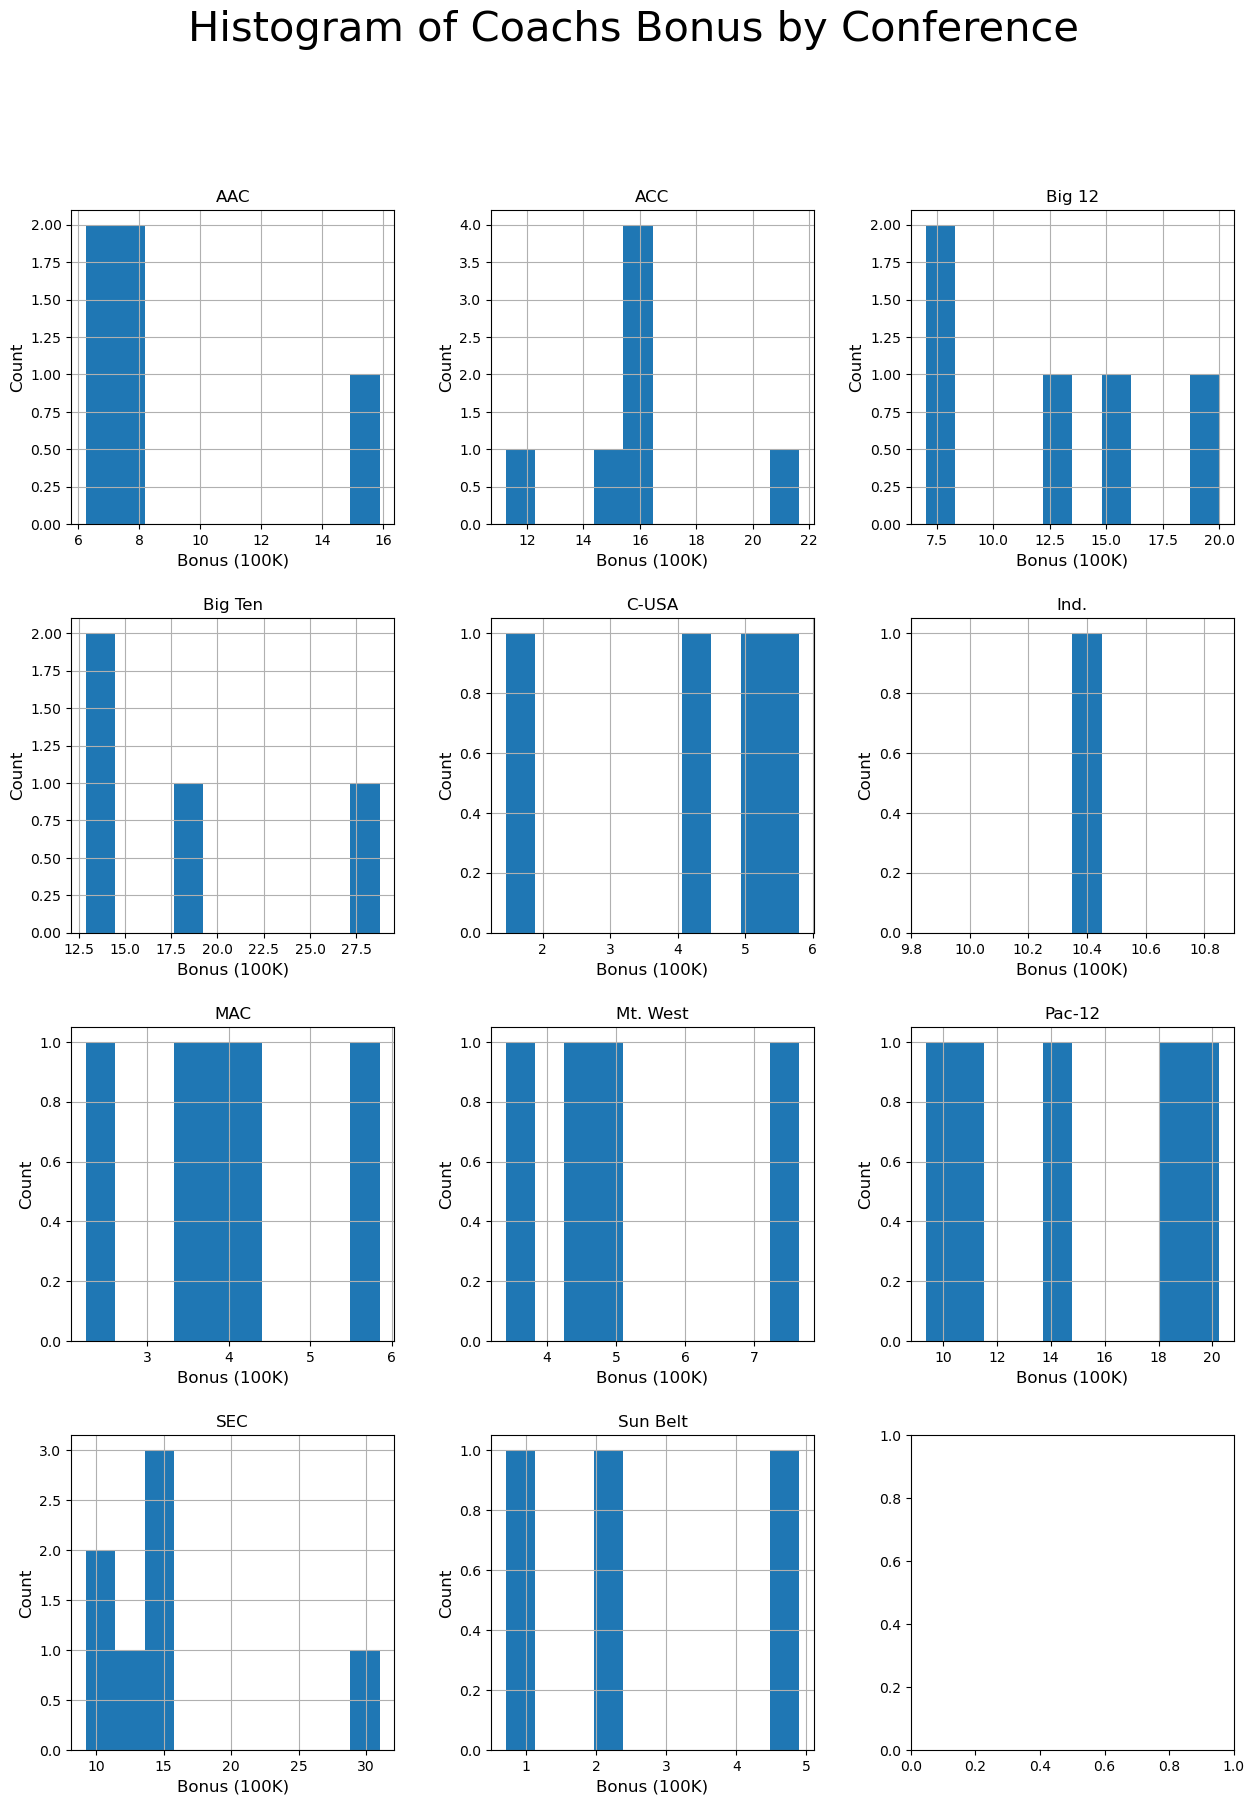

In [102]:

rcParams['figure.figsize'] = 15,20 #Size
fig, axes = plt.subplots(nrows=4, ncols=3) #Number of plots
fig.subplots_adjust(hspace=0.5) 
fig.suptitle('Histogram of Coachs Bonus by Conference', fontsize=30) #Title

# HISTOGRAM
for ax, (conference, subdf) in zip(axes.flatten(), analysis1.groupby('Conference')): #Conference
    subdf.hist('Bonus', ax=ax) #Bonus
    ax.set_title(conference) #Title
    ax.set_xlabel('Bonus (100K)',fontsize=12) #xlab Bonus
    ax.set_ylabel('Count', fontsize=12) #ylab Count

plt.show()

Text(0.5, 1.0, 'Coach Salary Versus Win Percent by Conference')

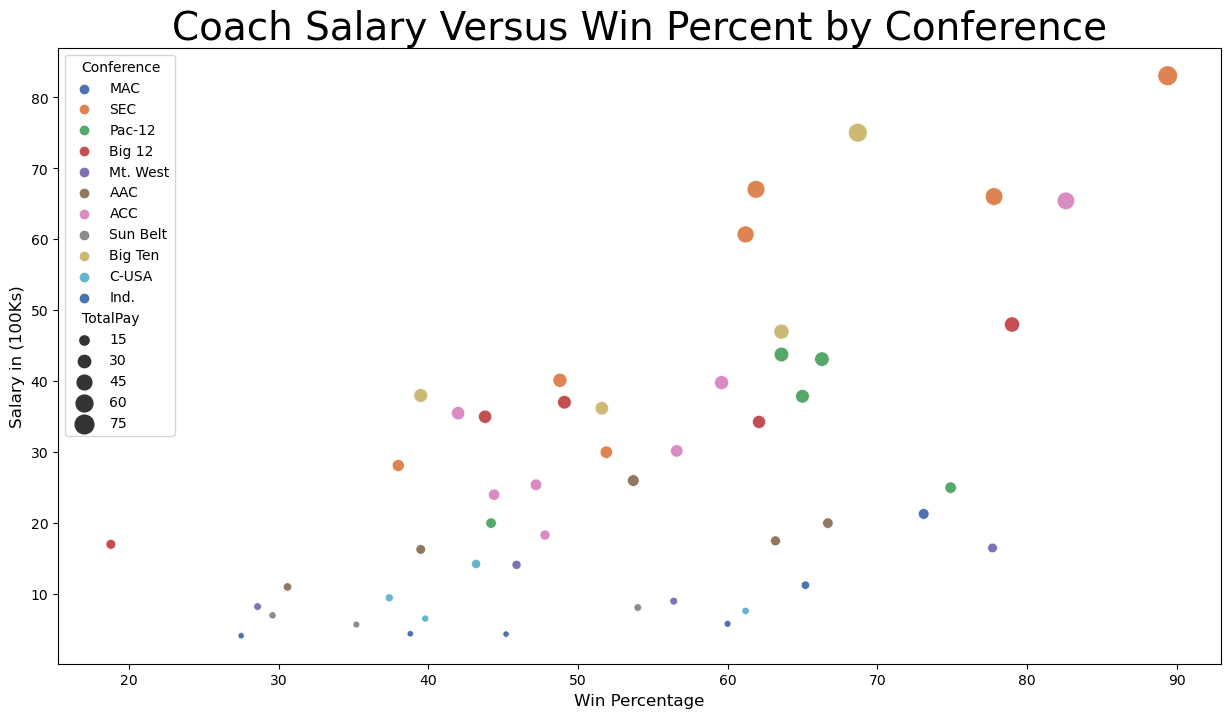

In [103]:
# Scatter plot of the Coaches salaries versus Win Percentage by Conference

rcParams['figure.figsize'] = 15,8 #Paramaters
scplotTotPay = sb.scatterplot(data=analysis1, x='Win_Percent', y='TotalPay', hue='Conference', palette='deep',size='TotalPay', sizes=(20,200)) #Scatterplot of Salary by Team Win Percentage
scplotTotPay.set_xlabel('Win Percentage', fontdict={'fontsize':12}) #xlab
scplotTotPay.set_ylabel('Salary in (100Ks)', fontdict={'fontsize':12}) #ylab
scplotTotPay.set_title('Coach Salary Versus Win Percent by Conference', fontdict={'fontsize':28}) #Main Title

Text(0.5, 1.0, 'Graduation Rate Versus Coaches Salaries By Conference')

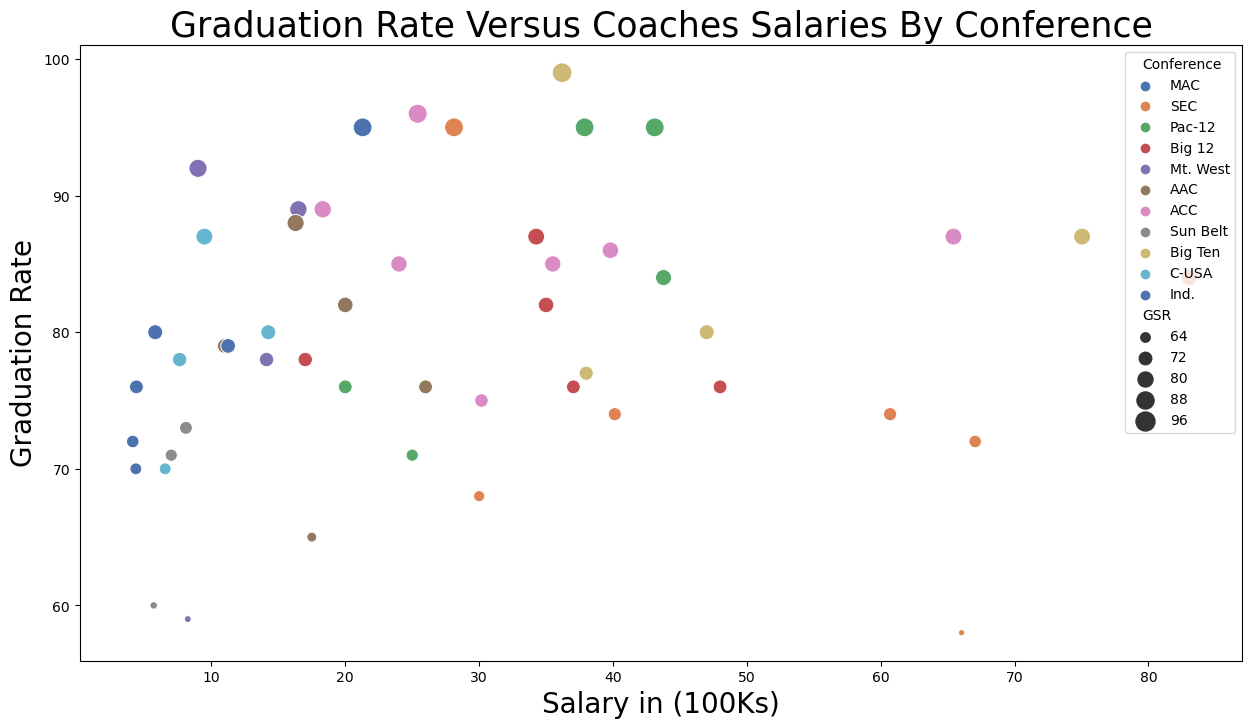

In [104]:
# Scatter plot of  Coaches salaries vs Graduation Rate by Conference

rcParams['figure.figsize'] = 15,8 #Plot parameters
scplotTotPay = sb.scatterplot(data=analysis1, x='TotalPay', y='GSR', hue='Conference', palette='deep',size='GSR', sizes=(20,200)) #Creating a 3D Scatterplot
scplotTotPay.set_xlabel('Salary in (100Ks)', fontdict={'fontsize':20}) #xLabel
scplotTotPay.set_ylabel('Graduation Rate', fontdict={'fontsize':20}) #GSR quals graduation rate of students in the plot (noot gun shot residue), ylab
scplotTotPay.set_title('Graduation Rate Versus Coaches Salaries By Conference', fontdict={'fontsize':25}) #main title

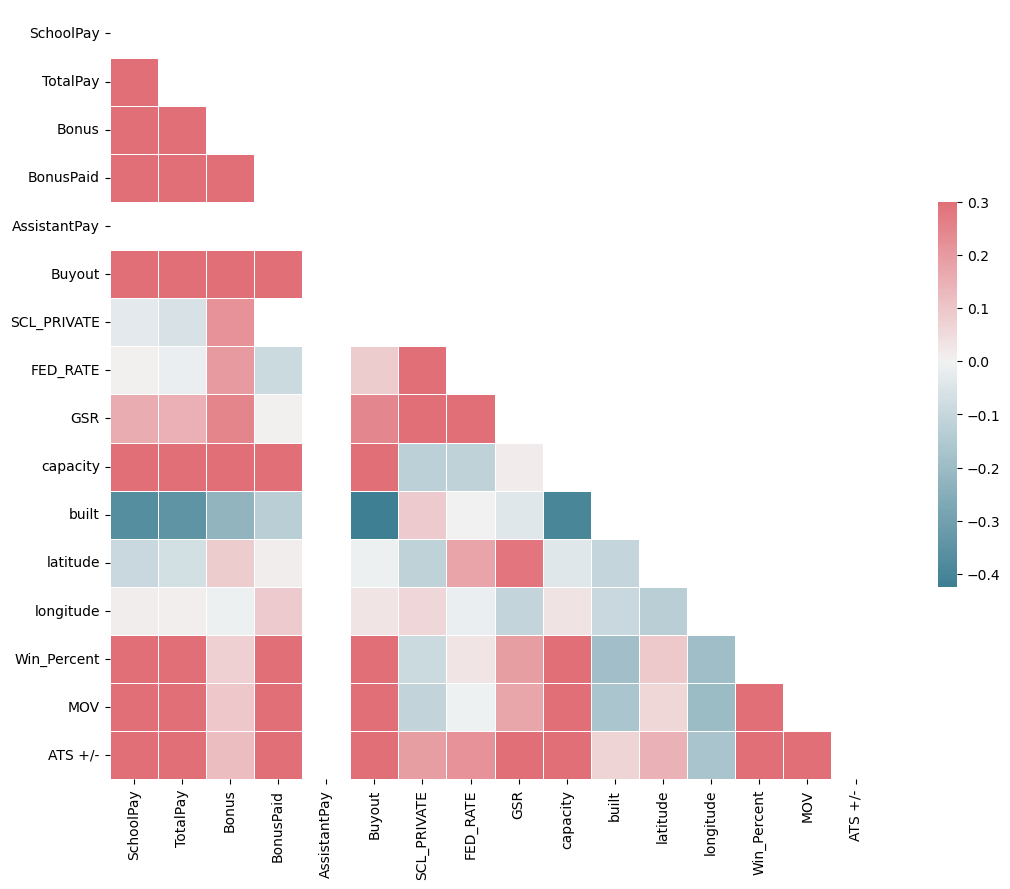

In [105]:
# Correlation matrix

rcParams['figure.figsize'] = 15,10
corr = analysis1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Generate a diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# **MODEL**

In [106]:
# 1st Model
np.random.seed(1234)
analysis1['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(analysis1))
analysis1_train = analysis1[analysis1['runiform'] >= 0.33]
analysis1_test = analysis1[analysis1['runiform'] < 0.33]

print('\nanalysis1_train data frame (rows, columns): ',analysis1_train.shape)
print(analysis1_train.head())
# check test data frame
print('\nanalysis_test data frame (rows, columns): ',analysis1_test.shape)
print(analysis1_test.head())

# specify a simple model
my_model = str('TotalPay ~ Win_Percent + SCL_PRIVATE + GSR + Bonus')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = analysis1_train).fit()

# summary of model fit to the training set
print(train_model_fit.summary())

# training set predictions from the model fit to the training set
analysis1_train['predict_TotalPay'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
analysis1_test['predict_TotalPay'] = train_model_fit.predict(analysis1_test)

# compute the proportion of response variance
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(analysis1_test['TotalPay'].corr(analysis1_test['predict_TotalPay']),2),3),'\n')


analysis1_train data frame (rows, columns):  (37, 27)
         team Conference         Coach  SchoolPay  TotalPay  Bonus  BonusPaid  \
1     Alabama        SEC    Nick Saban  8307000.0  83.07000  11.00   500000.0   
2     Arizona     Pac-12  Kevin Sumlin  1600000.0  20.00000  20.25        NaN   
3      Auburn        SEC   Gus Malzahn  6700000.0  67.05656  14.00   375000.0   
4  Ball State        MAC      Mike Neu   435689.0   4.35689   3.80    30000.0   
7  Cincinnati        AAC  Luke Fickell  2000000.0  20.00000   6.25        0.0   

   AssistantPay      Buyout  SCL_PRIVATE  ...  built  expanded  div  \
1             0  33600000.0            0  ...   1929      2010  fbs   
2             0  10000000.0            0  ...   1928      1988  fbs   
3             0  32143750.0            0  ...   1939      2004  fbs   
4             0    980300.0            0  ...   1967      2007  fbs   
7             0   7100000.0            0  ...   1924      2015  fbs   

    latitude   longitude Win-Lo

C:\Users\16512\AppData\Local\Temp\ipykernel_14932\3873787253.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis1_train['predict_TotalPay'] = train_model_fit.fittedvalues
C:\Users\16512\AppData\Local\Temp\ipykernel_14932\3873787253.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis1_test['predict_TotalPay'] = train_model_fit.predict(analysis1_test)


In [107]:
# 2 Model
np.random.seed(1234)
analysis1['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(analysis1))
analysis1_train2 = analysis1[analysis1['runiform'] >= 0.33]
analysis1_test2 = analysis1[analysis1['runiform'] < 0.33]

print('\nanalysis1_train data frame (rows, columns): ',analysis1_train.shape)
print(analysis1_train.head())
# check test data frame
print('\nanalysis_test data frame (rows, columns): ',analysis1_test.shape)
print(analysis1_test.head())

# specify a simple model
my_model2 = str('TotalPay ~ Win_Percent + capacity + GSR')

# fit the model to the training set
train_model_fit2 = smf.ols(my_model2, data = analysis1_train).fit()

# summary of model fit to the training set
print(train_model_fit2.summary())

# training set predictions from the model fit to the training set
analysis1_train2['predict_TotalPay'] = train_model_fit2.fittedvalues

# test set predictions from the model fit to the training set
analysis1_test2['predict_TotalPay'] = train_model_fit2.predict(analysis1_test)

# compute the proportion of response variance
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(analysis1_test2['TotalPay'].corr(analysis1_test2['predict_TotalPay']),2),3),'\n')


analysis1_train data frame (rows, columns):  (37, 28)
         team Conference         Coach  SchoolPay  TotalPay  Bonus  BonusPaid  \
1     Alabama        SEC    Nick Saban  8307000.0  83.07000  11.00   500000.0   
2     Arizona     Pac-12  Kevin Sumlin  1600000.0  20.00000  20.25        NaN   
3      Auburn        SEC   Gus Malzahn  6700000.0  67.05656  14.00   375000.0   
4  Ball State        MAC      Mike Neu   435689.0   4.35689   3.80    30000.0   
7  Cincinnati        AAC  Luke Fickell  2000000.0  20.00000   6.25        0.0   

   AssistantPay      Buyout  SCL_PRIVATE  ...  expanded  div   latitude  \
1             0  33600000.0            0  ...      2010  fbs  33.207490   
2             0  10000000.0            0  ...      1988  fbs  32.228340   
3             0  32143750.0            0  ...      2004  fbs  32.602362   
4             0    980300.0            0  ...      2007  fbs  40.216028   
7             0   7100000.0            0  ...      2015  fbs  39.131284   

    lon

C:\Users\16512\AppData\Local\Temp\ipykernel_14932\141212100.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis1_train2['predict_TotalPay'] = train_model_fit2.fittedvalues
C:\Users\16512\AppData\Local\Temp\ipykernel_14932\141212100.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis1_test2['predict_TotalPay'] = train_model_fit2.predict(analysis1_test)


In [108]:
# 3rd Model
np.random.seed(1234) #Setting a random seed to make this reproducable.
analysis1['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(analysis1))
analysis1_train3 = analysis1[analysis1['runiform'] >= 0.33]
analysis1_test3 = analysis1[analysis1['runiform'] < 0.33]

print('\nanalysis1_train data frame (rows, columns): ',analysis1_train.shape) #Train
print(analysis1_train.head()) #Taking a look at training data
print('\nanalysis_test data frame (rows, columns): ',analysis1_test.shape) #Test Data
print(analysis1_test.head()) #taking a look

my_model3 = str('TotalPay ~ Win_Percent + capacity +  GSR + built') # specify a simple model

train_model_fit3 = smf.ols(my_model3, data = analysis1_train).fit() # fit the model to the training set

print(train_model_fit3.summary())# summary of model fit to the training set

analysis1_train3['predict_TotalPay'] = train_model_fit3.fittedvalues # training set predictions from the model fit to the training set

analysis1_test3['predict_TotalPay'] = train_model_fit3.predict(analysis1_test) # test set predictions from the model fit to the training set

print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(analysis1_test3['TotalPay'].corr(analysis1_test3['predict_TotalPay']),2),3),'\n') # compute the proportion of response variance

C:\Users\16512\AppData\Local\Temp\ipykernel_14932\3168410701.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis1_train3['predict_TotalPay'] = train_model_fit3.fittedvalues # training set predictions from the model fit to the training set



analysis1_train data frame (rows, columns):  (37, 28)
         team Conference         Coach  SchoolPay  TotalPay  Bonus  BonusPaid  \
1     Alabama        SEC    Nick Saban  8307000.0  83.07000  11.00   500000.0   
2     Arizona     Pac-12  Kevin Sumlin  1600000.0  20.00000  20.25        NaN   
3      Auburn        SEC   Gus Malzahn  6700000.0  67.05656  14.00   375000.0   
4  Ball State        MAC      Mike Neu   435689.0   4.35689   3.80    30000.0   
7  Cincinnati        AAC  Luke Fickell  2000000.0  20.00000   6.25        0.0   

   AssistantPay      Buyout  SCL_PRIVATE  ...  expanded  div   latitude  \
1             0  33600000.0            0  ...      2010  fbs  33.207490   
2             0  10000000.0            0  ...      1988  fbs  32.228340   
3             0  32143750.0            0  ...      2004  fbs  32.602362   
4             0    980300.0            0  ...      2007  fbs  40.216028   
7             0   7100000.0            0  ...      2015  fbs  39.131284   

    lon

C:\Users\16512\AppData\Local\Temp\ipykernel_14932\3168410701.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis1_test3['predict_TotalPay'] = train_model_fit3.predict(analysis1_test) # test set predictions from the model fit to the training set


In [109]:
# Create a new analysis data from with just data from the ACC conference

analysis2 = cleanMerge.loc[(cleanMerge['Conference'] == 'ACC')]
analysis2

,team,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,SCL_PRIVATE,...,built,expanded,div,latitude,longitude,Win-Loss Record,Win_Percent,MOV,ATS +/-,runiform
8,Clemson,ACC,Dabo Swinney,6205000.0,65.43350,11.25000,500000.0,0,35000000.0,0,...,1942,2006,fbs,34.678747,-82.843180,147-31-0,82.6,17.3,1.8,0.958139
10,Duke,ACC,David Cutcliffe,2540928.0,25.40928,15.87639,NaN,0,NaN,1,...,1929,2014,fbs,35.995317,-78.941724,77-86-0,47.2,-1.1,0.1,0.357817
20,Louisville,ACC,Bobby Petrino,3980434.0,39.80434,14.72917,869917.0,0,14056250.0,0,...,1998,2009,fbs,38.205422,-85.758106,99-67-0,59.6,5.8,-0.2,0.364886
33,Pittsburgh,ACC,Pat Narduzzi,3017718.0,30.17718,15.87639,NaN,0,NaN,0,...,2001,NaN,fbs,40.446784,-80.015756,95-73-0,56.6,3.9,0.5,0.143767
37,Syracuse,ACC,Dino Babers,2401206.0,24.01206,15.87639,NaN,0,NaN,1,...,1980,NaN,fbs,43.036133,-76.136520,71-89-0,44.4,-1.9,0.9,0.924868
46,Virginia,ACC,Bronco Mendenhall,3550000.0,35.50000,21.65000,75000.0,0,18193750.0,0,...,1931,2000,fbs,38.031124,-78.513708,66-91-0,42.0,-2.5,-1.3,0.043324
47,Wake Forest,ACC,Dave Clawson,1831580.0,18.31580,15.87639,NaN,0,NaN,1,...,1968,2007,fbs,36.091835,-80.255342,77-84-0,47.8,-1.4,0.3,0.561433


In [130]:
# ACC salary model
my_model_ACC = ('TotalPay ~ Win_Percent + SCL_PRIVATE + GSR + Bonus')
my_model_fit_ACC = smf.ols(my_model_ACC, data = analysis2).fit()

print(my_model_fit_ACC.summary())

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     6.974
Date:                Tue, 31 Jan 2023   Prob (F-statistic):              0.129
Time:                        18:42:39   Log-Likelihood:                -19.153
No. Observations:                   7   AIC:                             48.31
Df Residuals:                       2   BIC:                             48.04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -137.3928     93.786     -1.465      

c:\Users\16512\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [111]:
# Create a new analysis data from with just data from the Big Ten conference
analysis3 = cleanMerge.loc[(cleanMerge['Conference'] == 'Big Ten')]
analysis3

,team,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,SCL_PRIVATE,...,built,expanded,div,latitude,longitude,Win-Loss Record,Win_Percent,MOV,ATS +/-,runiform
15,Iowa,Big Ten,Kirk Ferentz,4700000.0,47.00000,28.75,600000.0,0,22396250.0,0,...,1929,2006,fbs,41.658389,-91.551476,105-60-0,63.6,7.2,2.7,0.561196
23,Michigan,Big Ten,Jim Harbaugh,7504000.0,75.04000,13.25,150000.0,0,17111110.0,0,...,1927,2015,fbs,42.265869,-83.748726,112-51-0,68.7,11.6,0.5,0.368824
27,Northwestern,Big Ten,Pat Fitzgerald,3619775.0,36.19775,18.30,NaN,0,NaN,1,...,1926,1997,fbs,42.065400,-87.692496,83-78-0,51.6,-0.5,-0.2,0.788730
34,Purdue,Big Ten,Jeff Brohm,3800000.0,38.00000,12.90,180000.0,0,21516667.0,0,...,1924,2006,fbs,40.434323,-86.918485,62-95-0,39.5,-4.7,-1.2,0.704261


In [127]:
# Big Ten salary model
#my_model_Big_Ten = ('TotalPay ~ Win_Percent + SCL_PRIVATE + GSR + Bonus')
#my_model3 = str('TotalPay ~ Win_Percent + capacity +  GSR + built') # specify a simple model
my_model_Big_Ten = ('TotalPay ~ Win_Percent + capacity + GSR + built + Bonus')
my_model_fit_Big_Ten = smf.ols(my_model_Big_Ten, data = analysis1).fit()
print(my_model_fit_Big_Ten.summary())


                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     50.30
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           4.26e-17
Time:                        18:16:03   Log-Likelihood:                -173.06
No. Observations:                  50   AIC:                             358.1
Df Residuals:                      44   BIC:                             369.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -64.9362     81.287     -0.799      

#**INTERPRET**#

In [113]:
# Recommend Salary range for a Head Coach in the ACC (I am too inexperienced at this to do all of the conferences and this has been the longest google-fest of my
#life. I hope that the next two homeworks are similarly doable but I have a feeling this is going to get harder. Also, thank you to Google, The Book, Classmates, etc-
# I could not get this far stumbling through without them. - Allison)

def Syracuse_salary(Win_Percent, Public_O_or_Private_1, GSR, Bonus_100K): #Setting up a a comparison of predicted salary for public versus private schools in the ACC. 
  
  #This is set up for only one coach as well, although it could easily be replaced with others, at least within the two conferences analyzed. What we are doing is a regression
  #like model where we taking the factors we chose to evaluate, which here are Win Percentage, Public or Private School, and the bonus coaches within that generally get. 

  y = round((1.4654*Win_Percent - 0.9558*Public_O_or_Private_1 + 0.4273*GSR + 2.8562*Bonus_100K - 126.4072)*100000) # The first comparison

  y2 = round((0.8661*Win_Percent - 2.6785*Public_O_or_Private_1 + 0.0361*GSR + 1.0366*Bonus_100K - 30.1099)*100000) #Second equation.
  
  if Public_O_or_Private_1 == 0: #Defining public versus private within our data in just the ACC Conference. 
    school = 'Public'
  else:
    school = 'Private'

  #**FINDINGS FOR ACC CONFERENCE**#

  print('Based on the ACC data only.\n  The recommend Coaches salary for DINO BABERS at Syracuse, based on his Win Percent of', Win_Percent,'% ,the school is',school,', the schools GSR of',GSR,'%, and his Bonus of $',Bonus_100K*100000,', their salary will be $', y,'+/-',round((analysis2['TotalPay'].std()*100000)),'\n')

  print('Based on the all colleges in the data set.\n  The recommend Coach salary for DINO BABERS at Syracuse, based on his Win Percent of', Win_Percent,'% ,the school is',school,', the schools GSR of',GSR,'%, and his Bonus of $',Bonus_100K*100000,', their salary will be $', y2,'+/-', round((analysis1['TotalPay'].std()*100000)))

In [114]:
cleanMerge.loc[(cleanMerge['team'] == 'Syracuse'), ['Coach', 'Win_Percent','SCL_PRIVATE', 'GSR','Bonus']] #Give us the values for our coach of choice1

,Coach,Win_Percent,SCL_PRIVATE,GSR,Bonus
37,Dino Babers,44.4,1,85.0,15.87639


In [115]:
Syracuse_salary(43.5,1,85,15.87639) #Plugging in the values all that code produced

Based on the ACC data only.
  The recommend Coaches salary for DINO BABERS at Syracuse, based on his Win Percent of 43.5 % ,the school is Private , the schools GSR of 85 %, and his Bonus of $ 1587639.0 , their salary will be $ 1804855 +/- 1558906 

Based on the all colleges in the data set.
  The recommend Coach salary for DINO BABERS at Syracuse, based on his Win Percent of 43.5 % ,the school is Private , the schools GSR of 85 %, and his Bonus of $ 1587639.0 , their salary will be $ 2441292 +/- 2017799


In [125]:
# Recommend Salary range for a Head Coach in the Big Ten, basically the same as our last analysis just using a difference Conference and the same variables, and eventually the same coach as before. 
def Big_Ten_new_salary(Win_Percent, Public_O_or_Private_1, GSR, Bonus_100K):
  y = round((1.2920*Win_Percent - 16.9789*Public_O_or_Private_1 + 0.0635*GSR - 1.5636*Bonus_100K -4.4417)*100000)
  
  y2 = round((0.8661*Win_Percent - 2.6785*Public_O_or_Private_1 + 0.0361*GSR + 1.0366*Bonus_100K - 30.1099)*100000)
  
  if Public_O_or_Private_1 == 0:
    school = 'Public'
  else:
    school = 'Private'

  print('Based on the Big Ten data only.\n The recommended Coach salary if DINO BABERS joins the Big Ten, based on his Win Percent of', Win_Percent,'% ,the school is',school,', the schools GSR of',GSR,'%, and his Bonus of $',Bonus_100K*100000,', his salary will be $', y,'+/-', round((analysis3['TotalPay'].std()*100000)),'\n')

  print('Based on the all colleges in the data set.\n The recommend Coach salary if DINO BABERS joins the Big Ten, based on his Win Percent of', Win_Percent,'% ,the school is',school,', the schools GSR of',GSR,'%, and his Bonus of $',Bonus_100K*100000,', his salary will be $', y2, '+/-', round((analysis1['TotalPay'].std()*100000)))

In [123]:
Big_Ten_new_salary(43.5,0,85,15.87639) #Plug in the Big Ten Data from the function

Based on the Big Ten data only.
 The recommended Coach salary if DINO BABERS joins the Big Ten, based on his Win Percent of 43.5 % ,the school is Public , the schools GSR of 85 %, and his Bonus of $ 1587639.0 , his salary will be $ 3233348 +/- 1795332 

Based on the all colleges in the data set.
 The recommend Coach salary if DINO BABERS joins the Big Ten, based on his Win Percent of 43.5 % ,the school is Public , the schools GSR of 85 %, and his Bonus of $ 1587639.0 , his salary will be $ 2709142 +/- 2017799
